#Setting up

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#dito ilalagay yung csv file location
chart_path = '/content/DITO Historical Data.csv'

Store the data

In [ ]:
trading_chart = pd.read_csv(chart_path, index_col = 'Date', parse_dates = True)

#optional if price is in thousands
if trading_chart['Price'].dtypes == 'O':
  trading_chart['Price'] = trading_chart['Price'].str.replace(',', '').astype(float)

trading_chart

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-02-05,14.54,14.10,14.60,13.84,58.10M,4.01%
2021-02-04,13.98,13.18,14.10,13.04,51.04M,3.56%
2021-02-03,13.50,14.20,14.44,13.50,85.59M,-1.17%
2021-02-02,13.66,12.72,13.66,12.72,69.17M,9.28%
2021-02-01,12.50,12.00,12.60,11.90,39.95M,4.17%
...,...,...,...,...,...,...
2012-05-08,3.00,2.98,3.10,2.88,566.00K,0.00%
2012-05-07,3.00,3.04,3.06,2.98,914.00K,-2.28%
2012-05-04,3.07,3.07,3.07,3.05,316.00K,-0.32%


#Volume Average

In [ ]:
trading_chart['Volume'] = trading_chart['Vol.']
for i in range(len(trading_chart)):
  if 'K' in trading_chart['Vol.'][i]:
    trading_chart['Volume'][i] = trading_chart['Vol.'][i].replace('K', '')
    trading_chart['Volume'][i] = float(trading_chart['Volume'][i])
  if 'M' in trading_chart['Vol.'][i]:
    trading_chart['Volume'][i] = trading_chart['Vol.'][i].replace('M', '')
    trading_chart['Volume'][i] = float(trading_chart['Volume'][i])
    trading_chart['Volume'][i] = trading_chart["Volume"][i] * 1000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: Settin

In [ ]:
volume_average = pd.read_csv(chart_path, index_col = 'Date', parse_dates = True)

#define a function for number of days you want to make for moving average

def vol_average(n):

  #lalagyan ng moving average mo for this function only
  moving_average = []

  global trading_chart

  #calculation for the moving average
  for i in range(len(trading_chart)):
    if i > len(trading_chart) - n:
      moving_average.append(np.nan)
    else:
      moving_average.append(trading_chart['Volume'][i:i+n].mean())

  #ilalagay na yung bagong dataset sa trading_chart
  new_set = 'Moving_Average_' + str(n)
  volume_average[new_set] = moving_average
  return volume_average

In [ ]:
vol_average(15).head(15)

,Price,Open,High,Low,Vol.,Change %,Moving_Average_15
Date,,,,,,,
2021-02-05,14.54,14.10,14.60,13.84,58.10M,4.01%,45551.333333
2021-02-04,13.98,13.18,14.10,13.04,51.04M,3.56%,43339.333333
2021-02-03,13.50,14.20,14.44,13.50,85.59M,-1.17%,41616.666667
2021-02-02,13.66,12.72,13.66,12.72,69.17M,9.28%,38433.333333
2021-02-01,12.50,12.00,12.60,11.90,39.95M,4.17%,37400.000000
2021-01-29,12.00,11.92,12.10,11.70,11.84M,0.67%,38148.666667
2021-01-28,11.92,11.58,12.30,11.54,24.15M,1.36%,41994.666667
2021-01-27,11.76,11.02,11.92,10.76,29.79M,6.72%,47640.000000
2021-01-26,11.02,12.00,12.10,11.00,42.34M,-9.37%,63165.333333


#Simple Moving Average

In [ ]:
simple_moving_average = pd.read_csv(chart_path, index_col = 'Date', parse_dates = True)

#define a function for number of days you want to make for moving average

def set_days_SMA(n):

  #lalagyan ng moving average mo for this function only
  moving_average = []

  global trading_chart

  #calculation for the moving average
  for i in range(len(trading_chart)):
    if i > len(trading_chart) - n:
      moving_average.append(np.nan)
    else:
      moving_average.append(trading_chart['Price'][i:i+n].mean())

  #ilalagay na yung bagong dataset sa trading_chart
  new_set = 'Moving_Average_' + str(n)
  simple_moving_average[new_set] = moving_average
  return simple_moving_average

In [ ]:
for i in range(1, 101):
  set_days_SMA(i)

In [ ]:
simple_moving_average

,Price,Open,High,Low,Vol.,Change %,Moving_Average_1,Moving_Average_2,Moving_Average_3,Moving_Average_4,Moving_Average_5,Moving_Average_6,Moving_Average_7,Moving_Average_8,Moving_Average_9,Moving_Average_10,Moving_Average_11,Moving_Average_12,Moving_Average_13,Moving_Average_14,Moving_Average_15,Moving_Average_16,Moving_Average_17,Moving_Average_18,Moving_Average_19,Moving_Average_20,Moving_Average_21,Moving_Average_22,Moving_Average_23,Moving_Average_24,Moving_Average_25,Moving_Average_26,Moving_Average_27,Moving_Average_28,Moving_Average_29,Moving_Average_30,Moving_Average_31,Moving_Average_32,Moving_Average_33,Moving_Average_34,...,Moving_Average_61,Moving_Average_62,Moving_Average_63,Moving_Average_64,Moving_Average_65,Moving_Average_66,Moving_Average_67,Moving_Average_68,Moving_Average_69,Moving_Average_70,Moving_Average_71,Moving_Average_72,Moving_Average_73,Moving_Average_74,Moving_Average_75,Moving_Average_76,Moving_Average_77,Moving_Average_78,Moving_Average_79,Moving_Average_80,Moving_Average_81,Moving_Average_82,Moving_Average_83,Moving_Average_84,Moving_Average_85,Moving_Average_86,Moving_Average_87,Moving_Average_88,Moving_Average_89,Moving_Average_90,Moving_Average_91,Moving_Average_92,Moving_Average_93,Moving_Average_94,Moving_Average_95,Moving_Average_96,Moving_Average_97,Moving_Average_98,Moving_Average_99,Moving_Average_100
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-05,14.54,14.10,14.60,13.84,58.10M,4.01%,14.54,14.260,14.006667,13.9200,13.636,13.363333,13.157143,12.9825,12.764444,12.704,12.667273,12.620000,12.490769,12.408571,12.374667,12.35625,12.343529,12.328889,12.309474,12.328,12.365714,12.380909,12.375652,12.418333,12.4424,12.383077,12.287778,12.159643,12.026552,11.904000,11.775806,11.649063,11.527879,11.415882,...,9.294754,9.254677,9.212698,9.167656,9.122000,9.076364,9.034030,8.990882,8.950290,8.911143,8.869577,8.831944,8.795342,8.754054,8.714267,8.689211,8.664805,8.627564,8.585443,8.539375,8.495556,8.446707,8.395542,8.344405,8.294706,8.244651,8.197241,8.146818,8.096742,8.046889,7.998462,7.950978,7.902366,7.854468,7.807053,7.759896,7.713402,7.668265,7.624444,7.5813
2021-02-04,13.98,13.18,14.10,13.04,51.04M,3.56%,13.98,13.740,13.713333,13.4100,13.128,12.926667,12.760000,12.5425,12.500000,12.480,12.445455,12.320000,12.244615,12.220000,12.210667,12.20625,12.198824,12.185556,12.211579,12.257,12.278095,12.277273,12.326087,12.355000,12.2968,12.201154,12.071481,11.936786,11.813103,11.683667,11.555806,11.433750,11.321212,11.215882,...,9.168033,9.126774,9.082381,9.037344,8.992308,8.950606,8.908060,8.868088,8.829565,8.788571,8.751549,8.715556,8.674795,8.635541,8.611200,8.587500,8.550779,8.509103,8.463418,8.420000,8.371481,8.320610,8.269759,8.220357,8.170588,8.123488,8.073333,8.023523,7.973933,7.925778,7.878571,7.830217,7.782581,7.735426,7.688526,7.642292,7.597423,7.553878,7.511010,7.4692
2021-02-03,13.50,14.20,14.44,13.50,85.59M,-1.17%,13.50,13.580,13.220000,12.9150,12.716,12.556667,12.337143,12.3150,12.313333,12.292,12.169091,12.100000,12.084615,12.084286,12.088000,12.08750,12.080000,12.113333,12.166316,12.193,12.196190,12.250909,12.284348,12.226667,12.1300,11.998077,11.861111,11.735714,11.604483,11.475000,11.351613,11.238125,11.132121,11.024118,...,9.047213,9.003387,8.958889,8.914375,8.873231,8.831212,8.791791,8.753824,8.713333,8.676857,8.641408,8.601111,8.562329,8.538649,8.515600,8.479342,8.438052,8.392692,8.349620,8.301375,8.250741,8.200122,8.150964,8.101429,8.054588,8.004651,7.955057,7.905682,7.857753,7.810778,7.762637,7.715217,7.668280,7.621596,7.575579,7.530938,7.487629,7.445000,7.403434,7.3629
2021-02-02,13.66,12.72,13.66,12.72,69.17M,9.28%,13.66,13.080,12.720000,12.5200,12.368,12.143333,12.145714,12.1650,12.157778,12.036,11.972727,11.966667,11.975385,11.987143,11.993333,11.99125,12.031765,12.092222,12.124211,12.131,12.191429,12.229091,12.171304,12.072917,11.9380,11.798077,11.670370,11.536786,11.405172,11.280000,11.165161,11.058125,10.949091,10.837941,...,

#Buy/Sell Indicator (SMA)

In [ ]:
buy_sell_SMA_chart = pd.read_csv(chart_path, index_col = 'Date', parse_dates = True)

def buy_sell_SMA(moving_average_smaller, moving_average_bigger = 'Price', trading_chart = trading_chart):
  buy_signal = []
  sell_signal = []
  flag = -1
  label_smaller = 'Moving_Average_' + str(moving_average_smaller)

  if moving_average_bigger == 'Price':
    label_bigger = 'Price'
  else:
    label_bigger = 'Moving_Average_' + str(moving_average_bigger)

  #buy if price is higher than the moving average, sell if price is lower that MA
  for i in range(len(trading_chart)):
    if moving_average_bigger == 'Price':
      if trading_chart['Price'][i] < simple_moving_average[label_smaller][i]:
        if flag != 1:
          buy_signal.append(trading_chart['Price'][i])
          sell_signal.append(np.nan)
          flag = 1
        else:
          buy_signal.append(np.nan)
          sell_signal.append(np.nan)

      elif trading_chart['Price'][i] > simple_moving_average[label_smaller][i]:
        if flag != 0:
         sell_signal.append(trading_chart['Price'][i])
         buy_signal.append(np.nan)
         flag = 0
        else:
         sell_signal.append(np.nan)
         buy_signal.append(np.nan)

      else:
        buy_signal.append(np.nan)
        sell_signal.append(np.nan)

    #buy if shorter MA is higher than the longer MA, sell if vice versa
    else:
        if simple_moving_average[label_bigger][i] >= simple_moving_average[label_smaller][i]:
          if flag != 1:
            buy_signal.append(trading_chart['Price'][i])
            sell_signal.append(np.nan)
            flag = 1
          else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)

        elif simple_moving_average[label_bigger][i] <= simple_moving_average[label_smaller][i]:
          if flag != 0:
            sell_signal.append(trading_chart['Price'][i])
            buy_signal.append(np.nan)
            flag = 0
          else:
            sell_signal.append(np.nan)
            buy_signal.append(np.nan)

        else:
          buy_signal.append(np.nan)
          sell_signal.append(np.nan)

  if moving_average_bigger == 'Price':
    buy_label = 'buy_signal_for_' + str(moving_average_smaller) + '_and_' + 'Price'
    sell_label = 'sell_signal_for_' + str(moving_average_smaller) + '_and_' + 'Price'
    buy_sell_SMA_chart[buy_label] = buy_signal
    buy_sell_SMA_chart[sell_label] = sell_signal

  else:
    buy_label = 'buy_signal_for_' + str(moving_average_smaller) + '_and_' + str(moving_average_bigger)
    sell_label = 'sell_signal_for_' + str(moving_average_smaller) + '_and_' + str(moving_average_bigger)
    buy_sell_SMA_chart[buy_label] = buy_signal
    buy_sell_SMA_chart[sell_label] = sell_signal

  return buy_sell_SMA

In [ ]:
for i in range(5, 101):
  for m in range(5, 101):
    if i < m:
      buy_sell_SMA(i, m)

  buy_sell_SMA(i)

In [ ]:
buy_sell_SMA_chart

,Price,Open,High,Low,Vol.,Change %,buy_signal_for_5_and_6,sell_signal_for_5_and_6,buy_signal_for_5_and_7,sell_signal_for_5_and_7,buy_signal_for_5_and_8,sell_signal_for_5_and_8,buy_signal_for_5_and_9,sell_signal_for_5_and_9,buy_signal_for_5_and_10,sell_signal_for_5_and_10,buy_signal_for_5_and_11,sell_signal_for_5_and_11,buy_signal_for_5_and_12,sell_signal_for_5_and_12,buy_signal_for_5_and_13,sell_signal_for_5_and_13,buy_signal_for_5_and_14,sell_signal_for_5_and_14,buy_signal_for_5_and_15,sell_signal_for_5_and_15,buy_signal_for_5_and_16,sell_signal_for_5_and_16,buy_signal_for_5_and_17,sell_signal_for_5_and_17,buy_signal_for_5_and_18,sell_signal_for_5_and_18,buy_signal_for_5_and_19,sell_signal_for_5_and_19,buy_signal_for_5_and_20,sell_signal_for_5_and_20,buy_signal_for_5_and_21,sell_signal_for_5_and_21,buy_signal_for_5_and_22,sell_signal_for_5_and_22,...,buy_signal_for_95_and_97,sell_signal_for_95_and_97,buy_signal_for_95_and_98,sell_signal_for_95_and_98,buy_signal_for_95_and_99,sell_signal_for_95_and_99,buy_signal_for_95_and_100,sell_signal_for_95_and_100,buy_signal_for_95_and_Price,sell_signal_for_95_and_Price,buy_signal_for_96_and_97,sell_signal_for_96_and_97,buy_signal_for_96_and_98,sell_signal_for_96_and_98,buy_signal_for_96_and_99,sell_signal_for_96_and_99,buy_signal_for_96_and_100,sell_signal_for_96_and_100,buy_signal_for_96_and_Price,sell_signal_for_96_and_Price,buy_signal_for_97_and_98,sell_signal_for_97_and_98,buy_signal_for_97_and_99,sell_signal_for_97_and_99,buy_signal_for_97_and_100,sell_signal_for_97_and_100,buy_signal_for_97_and_Price,sell_signal_for_97_and_Price,buy_signal_for_98_and_99,sell_signal_for_98_and_99,buy_signal_for_98_and_100,sell_signal_for_98_and_100,buy_signal_for_98_and_Price,sell_signal_for_98_and_Price,buy_signal_for_99_and_100,sell_signal_for_99_and_100,buy_signal_for_99_and_Price,sell_signal_for_99_and_Price,buy_signal_for_100_and_Price,sell_signal_for_100_and_Price
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-05,14.54,14.10,14.60,13.84,58.10M,4.01%,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,...,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54
2021-02-04,13.98,13.18,14.10,13.04,51.04M,3.56%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-03,13.50,14.20,14.44,13.50,85.59M,-1.17%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-02,13.66,12.72,13.66,12.72,69.17M,9.28%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-01,12.50,12.00,12.60,11.90,39.95M,4.17%,12.5,NaN,12.5,NaN,12.5,NaN,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.5,NaN,12.5,NaN,12.5,NaN,12.5,NaN,12.5,NaN,12.5,NaN,12.5,NaN,12.5,NaN,12.5,NaN,12.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

Buying/Selling Price

In [ ]:
#the conditions when to buy/sell the stock
def price(smaller, bigger = 'Price'):
  if bigger == 'Price':
    buying_selling_price = (trading_chart['Price'][0:smaller-1].sum()) / (smaller -1)

  else:
    buying_selling_price = ((smaller * (trading_chart['Price'][0:bigger -1].sum())) - (bigger * (trading_chart['Price'][0:smaller - 1].sum()))) / (bigger - smaller)

  buying_price = buying_selling_price * (1 + 0.0025 + (0.0025 * 0.12) + 0.0001 + 0.00005)
  selling_price = buying_selling_price * (1 - (0.0025 + (0.0025 * 0.12) + 0.0001 + 0.00005 + 0.005))
  print('Stock Price to buy/sell (' + str(smaller) + ' and ' + str(bigger) + '):', '{:.02f}'.format(buying_selling_price))
  if buy_sell_SMA_chart['buy_signal_for_' + str(smaller) + '_and_' + str(bigger)][0] == trading_chart['Price'][0]:
    print('Total buying price:', '{:.02f}'.format(buying_price) + '\n')
  if buy_sell_SMA_chart['sell_signal_for_' + str(smaller) + '_and_' + str(bigger)][0] == trading_chart['Price'][0]:
    print('Total selling price:', '{:.02f}'.format(selling_price) + '\n')

In [ ]:
price(5, 10)

Stock Price to buy/sell (5 and 10): 3.52
Total selling price: 3.49



#Expected Return (SMA)

In [ ]:
def expected_return_SMA(smaller, bigger = 'Price', start_day = 0, days = len(trading_chart)):
  buying_price = []
  selling_price = []

  buy_first = []
  sell_first = []

  average_accuracy = 0
  good_trade = 0

  buy_label = 'buy_signal_for_' + str(smaller) + '_and_' + str(bigger)
  sell_label = 'sell_signal_for_' + str(smaller) + '_and_' + str(bigger)

  small_label = 'Moving_Average_' + str(smaller)

  # gets the intersection between moving averages and price for more accurate information
  if bigger == 'Price':
    for i in range(start_day+1, start_day+days):
      if buy_sell_SMA_chart[buy_label][i] == trading_chart['Price'][i]:
         m1 = trading_chart['Price'][i-1] - trading_chart['Price'][i]
         m2 = simple_moving_average[small_label][i-1] - simple_moving_average[small_label][i]
         y1 = trading_chart['Price'][i]
         y2 = simple_moving_average[small_label][i]
         buy_price = ((m1 * (-y2)) + (m2 * (y1))) / (m2-m1)
         buying_price.append(float('{:.02f}'.format(buy_price * (1 + 0.0025 + (0.0025 * 0.12) + 0.0001 + 0.00005))))
         buy_first.append(i)

      if buy_sell_SMA_chart[sell_label][i] == trading_chart['Price'][i]:
        m1 = trading_chart['Price'][i-1] - trading_chart['Price'][i]
        m2 = simple_moving_average[small_label][i-1] - simple_moving_average[small_label][i]
        y1 = trading_chart['Price'][i]
        y2 = simple_moving_average[small_label][i]
        sell_price = ((m1 * (-y2)) + (m2 * (y1))) / (m2-m1)
        selling_price.append(float('{:.02f}'.format(sell_price * (1 - (0.0025 + (0.0025 * 0.12) + 0.0001 + 0.00005 + 0.005)))))
        sell_first.append(i)

    if len(buy_first) != 0 and len(sell_first) != 0:
      if buy_first[0] < sell_first[0]:
       buying_price.remove(buying_price[0])

    #calculation for simple return
    rate = 0
    rate_per_trade = []
    if len(buy_first) != 0 and len(sell_first) != 0:
      for x in range(len(buying_price)):
        change = (selling_price[x] - buying_price[x]) / buying_price[x]
        if change < -0.1:
          change = -0.1
        rate += change
        rate_per_trade.append(float('{:.02f}'.format(change*100)))

    #calculation for cumulative return
    first = 0
    real_starting_price = 100
    real_return = []
    if len(buy_first) != 0 and len(sell_first) != 0:
      while first < len(rate_per_trade):
        real_cumu_rate = real_starting_price * (rate_per_trade[first] / 100)
        real_starting_price += real_cumu_rate
        real_return.append(real_starting_price)
        first += 1

  else:
    big_label = 'Moving_Average_' + str(bigger)
    for i in range(start_day+1, start_day+days):
      if buy_sell_SMA_chart[buy_label][i] == trading_chart['Price'][i]:
         mb = simple_moving_average[big_label][i-1] - simple_moving_average[big_label][i]
         ms = simple_moving_average[small_label][i-1] - simple_moving_average[small_label][i]
         m_price = trading_chart['Price'][i-1] - trading_chart['Price'][i]
         yb = simple_moving_average[big_label][i]
         ys = simple_moving_average[small_label][i]

         x_intersection = (ys - yb) / (mb - ms)

         buy_price = (m_price * x_intersection) + trading_chart['Price'][i]
         buying_price.append(float('{:.02f}'.format(buy_price * (1 + 0.0025 + (0.0025 * 0.12) + 0.0001 + 0.00005))))
         buy_first.append(i)

      if buy_sell_SMA_chart[sell_label][i] == trading_chart['Price'][i]:
        mb = simple_moving_average[big_label][i-1] - simple_moving_average[big_label][i]
        ms = simple_moving_average[small_label][i-1] - simple_moving_average[small_label][i]
        m_price = trading_chart['Price'][i-1] - trading_chart['Price'][i]
        yb = simple_moving_average[big_label][i]
        ys = simple_moving_average[small_label][i]

        x_intersection = (ys - yb) / (mb - ms)

        sell_price = (m_price * x_intersection) + trading_chart['Price'][i]
        selling_price.append(float('{:.02f}'.format(sell_price * (1 - (0.0025 + (0.0025 * 0.12) + 0.0001 + 0.00005 + 0.005)))))
        sell_first.append(i)

    if len(buy_first) != 0 and len(sell_first) != 0:
      if buy_first[0] < sell_first[0]:
       buying_price.remove(buying_price[0])

    rate = 0
    rate_per_trade = []
    if len(buy_first) != 0 and len(sell_first) != 0:
      for x in range(len(buying_price)):
        change = (selling_price[x] - buying_price[x]) / buying_price[x]
        if change < -0.1:
          change = -0.1
        rate += change
        rate_per_trade.append(float('{:.02f}'.format(change*100)))

    first = 0
    real_starting_price = 100
    real_return = []
    if len(buy_first) != 0 and len(sell_first) != 0:
      while first < len(rate_per_trade):
        real_cumu_rate = real_starting_price * (rate_per_trade[first] / 100)
        real_starting_price += real_cumu_rate
        real_return.append(real_starting_price)
        first += 1

  if len(rate_per_trade) > 0:
      for i in range(len(rate_per_trade)):
        if rate_per_trade[i] > 0:
          good_trade += 1

      average_accuracy = (good_trade / len(rate_per_trade)) * 100

  #return buying_price, selling_price, rate_per_trade #for scratch
  return rate*100, real_starting_price, smaller, bigger, average_accuracy

  '''rate_per_trade_statement = 'Rate per trade (Simple): '
  for i in range(len(rate_per_trade)-1):
    rate_per_trade_statement += str(rate_per_trade[i]) + ', '

  #if len(buy_first) != 0 and len(sell_first) != 0:
  #  rate_per_trade_statement += str(rate_per_trade[-1])

  real_return_statement = 'Cumulative Principal: '
  for g in range(len(real_return)-1):
    real_return_statement += '{:.02f}'.format(real_return[g]) +', '

  if len(buy_first) != 0 and len(sell_first) != 0:
    real_return_statement += '{:.02f}'.format(real_return[-1])'''

  '''#print('EXPECTED RATE OF RETURN FOR ' + str(smaller) + ' and ' + str(bigger) + ' MOVING AVERAGE:')
  #print('Expected Rate of Return (Simple):', '{:.02f}'.format(100+rate*100)+'%')
  #print(rate_per_trade_statement)
  #print('Expected Rate of Return (Cumulative):', '{:.02f}'.format(real_starting_price)+'%')
  #print(real_return_statement + '\n')'''

In [ ]:
days = []
simple_return = []
cumulative_return = []
avg_accuracy_SMA = []

#iterative approach to get all possible combinations of moving averages
for i in range(1, 101):
    for m in range(1, 101):
      if i < m:
        simple, cumulative, smaller, bigger, avg_acc_SMA = expected_return_SMA(i, m, 0, 260)
        simple_return.append(simple)
        cumulative_return.append(cumulative)
        days.append(str(smaller) + ' and ' + str(bigger))
        avg_accuracy_SMA.append(avg_acc_SMA)

    '''simple_price, cumulative_price, smaller_price, bigger_price, avg_acc_SMA_price = expected_return_SMA(i, 'Price', 0, 260)
    simple_return.append(simple_price)
    cumulative_return.append(cumulative_price)
    days.append(str(smaller_price) + ' and ' + str(bigger_price))
    avg_accuracy_SMA.append(avg_acc_SMA_price)'''

In [ ]:
#sorts which moving average combination will make the highest return/highest win rate
top5_SMA = pd.DataFrame()
top5_SMA['days'] = days
top5_SMA['simple_return'] = simple_return
top5_SMA['cumulative_return'] = cumulative_return
top5_SMA['average_accuracy'] = avg_accuracy_SMA

top5_SMA_simple_return = top5_SMA.sort_values(by = 'simple_return', ascending = False)
top5_SMA_cumulative_return = top5_SMA.sort_values(by = 'cumulative_return', ascending = False)
top5_SMA_avg_accuracy = top5_SMA.sort_values(by = 'average_accuracy', ascending = False)

In [ ]:
top5_SMA_simple_return.head()

In [ ]:
top5_SMA_cumulative_return.head()

In [ ]:
top5_SMA_avg_accuracy.head()

#Exponential Moving Average

In [ ]:
exponential_moving_average = pd.read_csv(chart_path, index_col = 'Date', parse_dates = True)

#define a function for number of days you want to make for moving average

def set_days_EMA(n):

  global trading_chart
  #lalagyan ng moving average mo for this function only
  moving_average = []
  moving_average.append(trading_chart['Price'][len(trading_chart) - 1])

  #calculation for the moving average
  for i in range(len(trading_chart)-1):
    expo_ave = (trading_chart['Price'][len(trading_chart) - 2 - i] * (2/(n+1))) + (moving_average[0] * (1 - (2/(n+1))))
    moving_average.insert(0, expo_ave)

  #ilalagay na yung bagong dataset sa trading_chart
  new_set = 'Moving_Average_' + str(n)
  exponential_moving_average[new_set] = moving_average

  return exponential_moving_average

In [ ]:
for i in range(2, 101):
  set_days_EMA(i)

In [ ]:
exponential_moving_average

,Price,Open,High,Low,Vol.,Change %,Moving_Average_2,Moving_Average_3,Moving_Average_4,Moving_Average_5,Moving_Average_6,Moving_Average_7,Moving_Average_8,Moving_Average_9,Moving_Average_10,Moving_Average_11,Moving_Average_12,Moving_Average_13,Moving_Average_14,Moving_Average_15,Moving_Average_16,Moving_Average_17,Moving_Average_18,Moving_Average_19,Moving_Average_20,Moving_Average_21,Moving_Average_22,Moving_Average_23,Moving_Average_24,Moving_Average_25,Moving_Average_26,Moving_Average_27,Moving_Average_28,Moving_Average_29,Moving_Average_30,Moving_Average_31,Moving_Average_32,Moving_Average_33,Moving_Average_34,Moving_Average_35,...,Moving_Average_61,Moving_Average_62,Moving_Average_63,Moving_Average_64,Moving_Average_65,Moving_Average_66,Moving_Average_67,Moving_Average_68,Moving_Average_69,Moving_Average_70,Moving_Average_71,Moving_Average_72,Moving_Average_73,Moving_Average_74,Moving_Average_75,Moving_Average_76,Moving_Average_77,Moving_Average_78,Moving_Average_79,Moving_Average_80,Moving_Average_81,Moving_Average_82,Moving_Average_83,Moving_Average_84,Moving_Average_85,Moving_Average_86,Moving_Average_87,Moving_Average_88,Moving_Average_89,Moving_Average_90,Moving_Average_91,Moving_Average_92,Moving_Average_93,Moving_Average_94,Moving_Average_95,Moving_Average_96,Moving_Average_97,Moving_Average_98,Moving_Average_99,Moving_Average_100
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-05,14.54,14.10,14.60,13.84,58.10M,4.01%,14.289309,14.068557,13.866071,13.685916,13.528846,13.392661,13.273902,13.168909,13.074358,12.987480,12.906093,12.828545,12.753623,12.680466,12.608478,12.537262,12.466563,12.396229,12.326180,12.256383,12.186836,12.117560,12.048584,11.979946,11.911684,11.843837,11.776441,11.709529,11.643133,11.577279,11.511989,11.447284,11.383179,11.319689,...,9.889797,9.842770,9.796274,9.750302,9.704848,9.659905,9.615466,9.571525,9.528076,9.485113,9.442629,9.400617,9.359073,9.317991,9.277363,9.237185,9.197451,9.158156,9.119293,9.080858,9.042845,9.005249,8.968064,8.931286,8.894910,8.858931,8.823343,8.788142,8.753324,8.718884,8.684816,8.651117,8.617782,8.584807,8.552188,8.519919,8.487998,8.456419,8.425179,8.394273
2021-02-04,13.98,13.18,14.10,13.04,51.04M,3.56%,13.787927,13.597114,13.416785,13.258874,13.124384,13.010214,12.912160,12.826136,12.748660,12.676977,12.609020,12.543302,12.478795,12.414818,12.350942,12.286920,12.222629,12.158032,12.093146,12.028021,11.962725,11.897338,11.831939,11.766608,11.701419,11.636440,11.571733,11.507353,11.443349,11.379764,11.316633,11.253989,11.191857,11.130259,...,9.734790,9.688762,9.643250,9.598248,9.553749,9.509748,9.466238,9.423213,9.380667,9.338594,9.296989,9.255846,9.215159,9.174922,9.135130,9.095777,9.056858,9.018368,8.980301,8.942652,8.905416,8.868588,8.832163,8.796137,8.760503,8.725259,8.690398,8.655916,8.621809,8.588072,8.554701,8.521691,8.489039,8.456739,8.424787,8.393181,8.361914,8.330984,8.300386,8.270117
2021-02-03,13.50,14.20,14.44,13.50,85.59M,-1.17%,13.403781,13.214227,13.041309,12.898311,12.782137,12.686952,12.607063,12.537670,12.475029,12.416372,12.359750,12.303852,12.247841,12.191221,12.133734,12.075284,12.015879,11.955591,11.894530,11.832823,11.770604,11.708005,11.645151,11.582159,11.519132,11.456166,11.393342,11.330735,11.268408,11.206415,11.144803,11.083613,11.022878,10.962627,...,9.593283,9.548066,9.503355,9.459145,9.415429,9.372202,9.329457,9.287189,9.245392,9.204061,9.163189,9.122771,9.082802,9.043276,9.004187,8.965531,8.927302,8.889494,8.852103,8.815124,8.778551,8.742380,8.706606,8.671224,8.636230,8.601618,8.567384,8.533523,8.500032,8.466905,8.434139,8.401728,8.369670,8.337959,8.306591,8.275563,8.244871,8.214510,8.184476,8.154766
2021-02-02,13.66,12.72,13.66,12.72,69.17M,9.28%,13.211343,12.928454,12.735514,12.597467,12.494992,12.415937,12.351938,12.297088,12.247257,12.199646,12.152432,12.104494,12.055201,12.004252,11.951565,11.897195,11.841277,11.783991,11.725533,11.666105,11.605900,11.545096,11.483860,11.422339,11.36

#Buy/Sell Indicator (EMA)

In [ ]:
buy_sell_EMA_chart = pd.read_csv(chart_path, index_col = 'Date', parse_dates = True)

def buy_sell_EMA(moving_average_smaller, moving_average_bigger = 'Price', trading_chart = trading_chart):
  buy_signal = []
  sell_signal = []
  flag = -1
  label_smaller = 'Moving_Average_' + str(moving_average_smaller)

  if moving_average_bigger == 'Price':
    label_bigger = 'Price'
  else:
    label_bigger = 'Moving_Average_' + str(moving_average_bigger)

  for i in range(len(trading_chart)):
    if moving_average_bigger == 'Price':
      if trading_chart['Price'][i] < exponential_moving_average[label_smaller][i]:
        if flag != 1:
          buy_signal.append(trading_chart['Price'][i])
          sell_signal.append(np.nan)
          flag = 1
        else:
          buy_signal.append(np.nan)
          sell_signal.append(np.nan)

      elif trading_chart['Price'][i] > exponential_moving_average[label_smaller][i]:
        if flag != 0:
         sell_signal.append(trading_chart['Price'][i])
         buy_signal.append(np.nan)
         flag = 0
        else:
         sell_signal.append(np.nan)
         buy_signal.append(np.nan)

      else:
        buy_signal.append(np.nan)
        sell_signal.append(np.nan)

    else:
        if exponential_moving_average[label_bigger][i] >= exponential_moving_average[label_smaller][i]:
          if flag != 1:
            buy_signal.append(trading_chart['Price'][i])
            sell_signal.append(np.nan)
            flag = 1
          else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)

        elif exponential_moving_average[label_bigger][i] <= exponential_moving_average[label_smaller][i]:
          if flag != 0:
            sell_signal.append(trading_chart['Price'][i])
            buy_signal.append(np.nan)
            flag = 0
          else:
            sell_signal.append(np.nan)
            buy_signal.append(np.nan)

        else:
          buy_signal.append(np.nan)
          sell_signal.append(np.nan)

  if moving_average_bigger == 'Price':
    buy_label = 'buy_signal_for_' + str(moving_average_smaller) + '_and_' + 'Price'
    sell_label = 'sell_signal_for_' + str(moving_average_smaller) + '_and_' + 'Price'
    buy_sell_EMA_chart[buy_label] = buy_signal
    buy_sell_EMA_chart[sell_label] = sell_signal

  else:
    buy_label = 'buy_signal_for_' + str(moving_average_smaller) + '_and_' + str(moving_average_bigger)
    sell_label = 'sell_signal_for_' + str(moving_average_smaller) + '_and_' + str(moving_average_bigger)
    buy_sell_EMA_chart[buy_label] = buy_signal
    buy_sell_EMA_chart[sell_label] = sell_signal

  return buy_sell_EMA

In [ ]:
for i in range(5, 101):
  for m in range(5, 101):
    if i < m:
      buy_sell_EMA(i, m)

  buy_sell_EMA(i)

In [ ]:
buy_sell_EMA_chart

,Price,Open,High,Low,Vol.,Change %,buy_signal_for_5_and_6,sell_signal_for_5_and_6,buy_signal_for_5_and_7,sell_signal_for_5_and_7,buy_signal_for_5_and_8,sell_signal_for_5_and_8,buy_signal_for_5_and_9,sell_signal_for_5_and_9,buy_signal_for_5_and_10,sell_signal_for_5_and_10,buy_signal_for_5_and_11,sell_signal_for_5_and_11,buy_signal_for_5_and_12,sell_signal_for_5_and_12,buy_signal_for_5_and_13,sell_signal_for_5_and_13,buy_signal_for_5_and_14,sell_signal_for_5_and_14,buy_signal_for_5_and_15,sell_signal_for_5_and_15,buy_signal_for_5_and_16,sell_signal_for_5_and_16,buy_signal_for_5_and_17,sell_signal_for_5_and_17,buy_signal_for_5_and_18,sell_signal_for_5_and_18,buy_signal_for_5_and_19,sell_signal_for_5_and_19,buy_signal_for_5_and_20,sell_signal_for_5_and_20,buy_signal_for_5_and_21,sell_signal_for_5_and_21,buy_signal_for_5_and_22,sell_signal_for_5_and_22,...,buy_signal_for_95_and_97,sell_signal_for_95_and_97,buy_signal_for_95_and_98,sell_signal_for_95_and_98,buy_signal_for_95_and_99,sell_signal_for_95_and_99,buy_signal_for_95_and_100,sell_signal_for_95_and_100,buy_signal_for_95_and_Price,sell_signal_for_95_and_Price,buy_signal_for_96_and_97,sell_signal_for_96_and_97,buy_signal_for_96_and_98,sell_signal_for_96_and_98,buy_signal_for_96_and_99,sell_signal_for_96_and_99,buy_signal_for_96_and_100,sell_signal_for_96_and_100,buy_signal_for_96_and_Price,sell_signal_for_96_and_Price,buy_signal_for_97_and_98,sell_signal_for_97_and_98,buy_signal_for_97_and_99,sell_signal_for_97_and_99,buy_signal_for_97_and_100,sell_signal_for_97_and_100,buy_signal_for_97_and_Price,sell_signal_for_97_and_Price,buy_signal_for_98_and_99,sell_signal_for_98_and_99,buy_signal_for_98_and_100,sell_signal_for_98_and_100,buy_signal_for_98_and_Price,sell_signal_for_98_and_Price,buy_signal_for_99_and_100,sell_signal_for_99_and_100,buy_signal_for_99_and_Price,sell_signal_for_99_and_Price,buy_signal_for_100_and_Price,sell_signal_for_100_and_Price
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-05,14.54,14.10,14.60,13.84,58.10M,4.01%,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,...,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54,NaN,14.54
2021-02-04,13.98,13.18,14.10,13.04,51.04M,3.56%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-03,13.50,14.20,14.44,13.50,85.59M,-1.17%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-02,13.66,12.72,13.66,12.72,69.17M,9.28%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-01,12.50,12.00,12.60,11.90,39.95M,4.17%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

Buying/Selling Price (EMA)

In [ ]:
def price(smaller, bigger = 'Price'):
  if bigger == 'Price':
    buying_selling_price = exponential_moving_average['Moving_Average_' + str(smaller)][0]

  else:
    buying_selling_price = ((exponential_moving_average['Moving_Average_' + str(smaller)][0] * (1 - (2/(smaller+1)))) - (exponential_moving_average['Moving_Average_' + str(bigger)][0] * (1 - (2/(bigger+1))))) / ((2/(bigger+1)) - (2/(smaller+1)))

  buying_price = buying_selling_price #* (1 + 0.0025 + (0.0025 * 0.12) + 0.0001 + 0.00005)
  selling_price = buying_selling_price #* (1 - (0.0025 + (0.0025 * 0.12) + 0.0001 + 0.00005 + 0.005))
  print('Stock Price to buy/sell (' + str(smaller) + ' and ' + str(bigger) + '):', '{:.02f}'.format(buying_selling_price))
  if buy_sell_EMA_chart['buy_signal_for_' + str(smaller) + '_and_' + str(bigger)][0] == trading_chart['Price'][0]:
    print('Total buying price:', '{:.02f}'.format(buying_price) + '\n')
  if buy_sell_EMA_chart['sell_signal_for_' + str(smaller) + '_and_' + str(bigger)][0] == trading_chart['Price'][0]:
    print('Total selling price:', '{:.02f}'.format(selling_price) + '\n')

In [ ]:
'''for i in range(5, 20):
  for m in range(5, 20):
    if i < m:
      price(i, m)'''
price(5)

Stock Price to buy/sell (5 and Price): 13.69
Total selling price: 13.69



#Expected Return (EMA)

In [ ]:
def expected_return_EMA(smaller, bigger = 'Price', start_day = 0, days = len(trading_chart)):
  buying_price = []
  selling_price = []

  buy_first = []
  sell_first = []

  average_accuracy = 0
  good_trade = 0

  buy_label = 'buy_signal_for_' + str(smaller) + '_and_' + str(bigger)
  sell_label = 'sell_signal_for_' + str(smaller) + '_and_' + str(bigger)

  small_label = 'Moving_Average_' + str(smaller)

  if bigger == 'Price':
    for i in range(start_day+1, start_day+days):
      if buy_sell_EMA_chart[buy_label][i] == trading_chart['Price'][i]:
         m1 = trading_chart['Price'][i-1] - trading_chart['Price'][i]
         m2 = exponential_moving_average[small_label][i-1] - exponential_moving_average[small_label][i]
         y1 = trading_chart['Price'][i]
         y2 = exponential_moving_average[small_label][i]
         buy_price = ((m1 * (-y2)) + (m2 * (y1))) / (m2-m1)
         buying_price.append(float('{:.02f}'.format(buy_price * (1 + 0.0025 + (0.0025 * 0.12) + 0.0001 + 0.00005))))
         buy_first.append(i)

      if buy_sell_EMA_chart[sell_label][i] == trading_chart['Price'][i]:
        m1 = trading_chart['Price'][i-1] - trading_chart['Price'][i]
        m2 = exponential_moving_average[small_label][i-1] - exponential_moving_average[small_label][i]
        y1 = trading_chart['Price'][i]
        y2 = exponential_moving_average[small_label][i]
        sell_price = ((m1 * (-y2)) + (m2 * (y1))) / (m2-m1)
        selling_price.append(float('{:.02f}'.format(sell_price * (1 - (0.0025 + (0.0025 * 0.12) + 0.0001 + 0.00005 + 0.005)))))
        sell_first.append(i)

    if len(buy_first) != 0 and len(sell_first) != 0:
      if buy_first[0] < sell_first[0]:
       buying_price.remove(buying_price[0])

    rate = 1
    rate_per_trade = []
    if len(buy_first) != 0 and len(sell_first) != 0:
      for x in range(len(buying_price)):
        change = (selling_price[x] - buying_price[x]) / buying_price[x]
        if change < -0.1:
          change = -0.1
        rate += change
        rate_per_trade.append(float('{:.02f}'.format(change*100)))

    first = 0
    real_starting_price = 100
    real_return = []
    if len(buy_first) != 0 and len(sell_first) != 0:
      while first < len(rate_per_trade):
        real_cumu_rate = real_starting_price * (rate_per_trade[first] / 100)
        real_starting_price += real_cumu_rate
        real_return.append(real_starting_price)
        first += 1

  else:
    big_label = 'Moving_Average_' + str(bigger)
    for i in range(start_day+1, start_day+days):
      if buy_sell_EMA_chart[buy_label][i] == trading_chart['Price'][i]:
         mb = exponential_moving_average[big_label][i-1] - exponential_moving_average[big_label][i]
         ms = exponential_moving_average[small_label][i-1] - exponential_moving_average[small_label][i]
         m_price = trading_chart['Price'][i-1] - trading_chart['Price'][i]
         yb = exponential_moving_average[big_label][i]
         ys = exponential_moving_average[small_label][i]

         x_intersection = (ys - yb) / (mb - ms)

         buy_price = (m_price * x_intersection) + trading_chart['Price'][i]
         buying_price.append(float('{:.02f}'.format(buy_price * (1 + 0.0025 + (0.0025 * 0.12) + 0.0001 + 0.00005))))
         buy_first.append(i)

      if buy_sell_EMA_chart[sell_label][i] == trading_chart['Price'][i]:
        mb = exponential_moving_average[big_label][i-1] - exponential_moving_average[big_label][i]
        ms = exponential_moving_average[small_label][i-1] - exponential_moving_average[small_label][i]
        m_price = trading_chart['Price'][i-1] - trading_chart['Price'][i]
        yb = exponential_moving_average[big_label][i]
        ys = exponential_moving_average[small_label][i]

        x_intersection = (ys - yb) / (mb - ms)

        sell_price = (m_price * x_intersection) + trading_chart['Price'][i]
        selling_price.append(float('{:.02f}'.format(sell_price * (1 - (0.0025 + (0.0025 * 0.12) + 0.0001 + 0.00005 + 0.005)))))
        sell_first.append(i)

    if len(buy_first) != 0 and len(sell_first) != 0:
      if buy_first[0] < sell_first[0]:
       buying_price.remove(buying_price[0])

    rate = 1
    rate_per_trade = []
    if len(buy_first) != 0 and len(sell_first) != 0:
      for x in range(len(buying_price)):
        change = (selling_price[x] - buying_price[x]) / buying_price[x]
        if change < -0.1:
          change = -0.1
        rate += change
        rate_per_trade.append(float('{:.02f}'.format(change*100)))

    first = 0
    real_starting_price = 100
    real_return = []
    if len(buy_first) != 0 and len(sell_first) != 0:
      while first < len(rate_per_trade):
        real_cumu_rate = real_starting_price * (rate_per_trade[first] / 100)
        real_starting_price += real_cumu_rate
        real_return.append(real_starting_price)
        first += 1


  if len(rate_per_trade) > 0:
      for i in range(len(rate_per_trade)):
        if rate_per_trade[i] > 0:
          good_trade += 1

      average_accuracy = (good_trade / len(rate_per_trade)) * 100

  return rate*100, real_starting_price, smaller, bigger, average_accuracy
  #return buying_price, selling_price #for scratch

  #quote here
  '''rate_per_trade_statement = 'Rate per trade (Simple): '
  for i in range(len(rate_per_trade)-1):
    rate_per_trade_statement += str(rate_per_trade[i]) + ', '

  #if len(buy_first) != 0 and len(sell_first) != 0:
  #  rate_per_trade_statement += str(rate_per_trade[-1])

  real_return_statement = 'Cumulative Principal: '
  for g in range(len(real_return)-1):
    real_return_statement += '{:.02f}'.format(real_return[g]) +', '

  if len(buy_first) != 0 and len(sell_first) != 0:
    real_return_statement += '{:.02f}'.format(real_return[-1])'''
  #unquote here

  '''print('EXPECTED RATE OF RETURN FOR ' + str(smaller) + ' and ' + str(bigger) + ' MOVING AVERAGE:')
  print('Expected Rate of Return (Simple):', '{:.02f}'.format(100+rate*100)+'%')
  print(rate_per_trade_statement)
  print('Expected Rate of Return (Cumulative):', '{:.02f}'.format(real_starting_price)+'%')
  print(real_return_statement + '\n')
  print('Good Trade:', good_trade)
  print('Number of Trades:', len(rate_per_trade))'''

In [ ]:
days_EMA = []
simple_return_EMA = []
cumulative_return_EMA = []
average_accuracy_EMA = []

for i in range(5, 101):
    for m in range(5, 101):
      if i < m:
        simple, cumulative, smaller, bigger, avg_accuracy = expected_return_EMA(i, m, 0, 260)
        simple_return_EMA.append(simple)
        cumulative_return_EMA.append(cumulative)
        days_EMA.append(str(smaller) + ' and ' + str(bigger))
        average_accuracy_EMA.append(avg_accuracy)

    simple_price, cumulative_price, smaller_price, bigger_price, avg_accuracy_price = expected_return_EMA(i, 'Price', 0, 260)
    simple_return_EMA.append(simple_price)
    cumulative_return_EMA.append(cumulative_price)
    days_EMA.append(str(smaller_price) + ' and ' + str(bigger_price))
    average_accuracy_EMA.append(avg_accuracy_price)

In [ ]:
top5_EMA = pd.DataFrame()
top5_EMA['days'] = days_EMA
top5_EMA['simple_return'] = simple_return_EMA
top5_EMA['cumulative_return'] = cumulative_return_EMA
top5_EMA['average_accuracy'] = average_accuracy_EMA

top5_simple_return_EMA = top5_EMA.sort_values(by = 'simple_return', ascending = False)
top5_cumulative_return_EMA = top5_EMA.sort_values(by = 'cumulative_return', ascending = False)
top5_avgacc_EMA = top5_EMA.sort_values(by = 'average_accuracy', ascending = False)

In [ ]:
top5_simple_return_EMA.head(5)

,days,simple_return,cumulative_return,average_accuracy
95,5 and Price,448.712598,1407.500274,64.000000
1169,17 and Price,438.176681,934.558843,57.142857
190,6 and Price,436.442692,1301.183934,60.869565
377,8 and Price,433.439987,1217.296102,50.000000
1252,18 and Price,430.793205,906.226755,71.428571


In [ ]:
top5_cumulative_return_EMA.head(5)

,days,simple_return,cumulative_return,average_accuracy
95,5 and Price,448.712598,1407.500274,64.000000
190,6 and Price,436.442692,1301.183934,60.869565
284,7 and Price,429.774483,1255.545712,45.000000
377,8 and Price,433.439987,1217.296102,50.000000
469,9 and Price,428.792584,1187.864617,60.000000


In [ ]:
top5_avgacc_EMA.head(5)

,days,simple_return,cumulative_return,average_accuracy
4655,100 and Price,112.704918,112.70,100.0
1268,19 and 35,113.304721,113.30,100.0
1266,19 and 33,115.450644,115.45,100.0
1265,19 and 32,116.239316,116.24,100.0
1264,19 and 31,116.450216,116.45,100.0


Sorting moving average days with highest accuracy

In [ ]:
top_highest_accuracy = pd.DataFrame()
top_highest_days = []
top_highest_simple_return = []
top_highest_cumulative_return = []
top_highest_avg_accuracy = []
for i in range(len(top5_avgacc_EMA)):
  if top5_avgacc_EMA['average_accuracy'][i] == max(top5_avgacc_EMA['average_accuracy']):
    top_highest_days.append(top5_avgacc_EMA['days'][i])
    top_highest_simple_return.append(top5_avgacc_EMA['simple_return'][i])
    top_highest_cumulative_return.append(top5_avgacc_EMA['cumulative_return'][i])
    top_highest_avg_accuracy.append(top5_avgacc_EMA['average_accuracy'][i])

top_highest_accuracy['days'] = top_highest_days
top_highest_accuracy['simple_return'] = top_highest_simple_return
top_highest_accuracy['cumulative_return'] = top_highest_cumulative_return
top_highest_accuracy['average_accuracy'] = top_highest_avg_accuracy

top_highest_accuracy.sort_values(by='cumulative_return', ascending =False).head(5)

,days,simple_return,cumulative_return,average_accuracy
52,6 and 17,295.084384,390.217812,100.0
0,5 and 19,293.151690,386.920508,100.0
1,5 and 20,287.114621,375.588173,100.0
53,6 and 18,287.471200,375.328212,100.0
110,7 and 17,280.692168,362.291020,100.0


#Hull Moving Average

In [ ]:
hull_moving_average = pd.read_csv(chart_path, index_col = 'Date', parse_dates = True)

#define a function for number of days you want to make for moving average

def set_days_HMA(n):

  global trading_chart

  #lalagyan ng moving average mo for this function only
  moving_average = []

  #weighted moving average
  wma_period = []
  wma_2 = []
  wma_3 = []

  for i in range(len(trading_chart)):
    if i <= len(trading_chart) - n:
      weight = 0
      for m in range(n):
        weight += (trading_chart['Price'][i+m] * (n-m))
      wma_period.append(weight / sum([i for i in range(n+1)]))
    else:
      wma_period.append(np.nan)

  n2 = 0
  if n % 2 == 0:
    n2 = n // 2
  else:
    n2 = (n+1) // 2

  for i in range(len(trading_chart)):
    if i <= len(trading_chart) - n2:
      weight = 0
      for m in range(n2):
        weight += (trading_chart['Price'][i+m] * (n2-m))
      wma_2.append(weight / sum([i for i in range(n2+1)]))
    else:
      wma_2.append(np.nan)

  for k in range(len(wma_period)-n):
    wma_3.append((2 * wma_2[k]) - wma_period[k])

  n3 = int((n) ** (1/2))
  for i in range(len(wma_3)):
    if i <= len(wma_3) - n3:
      weight = 0
      for m in range(n3):
        weight += (wma_3[i+m] * (n3-m))
      moving_average.append(weight / sum([i for i in range(n3 + 1)]))
    else:
      moving_average.append(np.nan)
  for i in range(len(trading_chart) - len(wma_3)):
    moving_average.append(np.nan)

  hull_moving_average['Moving_Average_' + str(n)] = moving_average

In [ ]:
set_days_HMA(9)

In [ ]:
hull_moving_average

In [ ]:
plt.figure(figsize =(16,6))

plt.plot(trading_chart['Price'][:60], label = "Price")
plt.plot(hull_moving_average['Moving_Average_20'][:60], label = 'HMA')


#show the plot
plt.legend(loc = 'upper left')
plt.show()

#Longer SMA and Shorter EMA

In [ ]:
buy_sell_combined_chart = pd.read_csv(chart_path, index_col = 'Date', parse_dates = True)

def buy_sell_combined(moving_average_smaller, moving_average_bigger, trading_chart = trading_chart):
  buy_signal = []
  sell_signal = []
  flag = -1
  label_smaller = 'Moving_Average_' + str(moving_average_smaller)

  if moving_average_bigger == 'Price':
    label_bigger = 'Price'
  else:
    label_bigger = 'Moving_Average_' + str(moving_average_bigger)

  for i in range(len(trading_chart)):
        if simple_moving_average[label_bigger][i] < exponential_moving_average[label_smaller][i]:
          if flag != 1:
            buy_signal.append(trading_chart['Price'][i])
            sell_signal.append(np.nan)
            flag = 1
          else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)

        elif simple_moving_average[label_bigger][i] > exponential_moving_average[label_smaller][i]:
          if flag != 0:
            sell_signal.append(trading_chart['Price'][i])
            buy_signal.append(np.nan)
            flag = 0
          else:
            sell_signal.append(np.nan)
            buy_signal.append(np.nan)

        else:
          buy_signal.append(np.nan)
          sell_signal.append(np.nan)

  buy_label = 'buy_signal_for_' + str(moving_average_smaller) + '_and_' + str(moving_average_bigger)
  sell_label = 'sell_signal_for_' + str(moving_average_smaller) + '_and_' + str(moving_average_bigger)
  buy_sell_combined_chart[buy_label] = buy_signal
  buy_sell_combined_chart[sell_label] = sell_signal

  return buy_sell_combined_chart

In [ ]:
for i in range(5, 101):
  for m in range(5, 101):
    if i < m:
      buy_sell_combined(i, m)

In [ ]:
def expected_return_combined(smaller, bigger = 'Price', start_day = 0, days = len(trading_chart)):
  buying_price = []
  selling_price = []

  buy_first = []
  sell_first = []

  average_accuracy = 0
  good_trade = 0

  buy_label = 'buy_signal_for_' + str(smaller) + '_and_' + str(bigger)
  sell_label = 'sell_signal_for_' + str(smaller) + '_and_' + str(bigger)

  small_label = 'Moving_Average_' + str(smaller)

  if bigger == 'Price':
    for i in range(start_day+1, start_day+days):
      if buy_sell_combined_chart[buy_label][i] == trading_chart['Price'][i]:
         m1 = trading_chart['Price'][i-1] - trading_chart['Price'][i]
         m2 = exponential_moving_average[small_label][i-1] - exponential_moving_average[small_label][i]
         y1 = trading_chart['Price'][i]
         y2 = exponential_moving_average[small_label][i]
         buy_price = ((m1 * (-y2)) + (m2 * (y1))) / (m2-m1)
         buying_price.append(float('{:.02f}'.format(buy_price * (1 + 0.0025 + (0.0025 * 0.12) + 0.0001 + 0.00005))))
         buy_first.append(i)

      if buy_sell_combined_chart[sell_label][i] == trading_chart['Price'][i]:
        m1 = trading_chart['Price'][i-1] - trading_chart['Price'][i]
        m2 = exponential_moving_average[small_label][i-1] - exponential_moving_average[small_label][i]
        y1 = trading_chart['Price'][i]
        y2 = exponential_moving_average[small_label][i]
        sell_price = ((m1 * (-y2)) + (m2 * (y1))) / (m2-m1)
        selling_price.append(float('{:.02f}'.format(sell_price * (1 - (0.0025 + (0.0025 * 0.12) + 0.0001 + 0.00005 + 0.005)))))
        sell_first.append(i)

    if len(buy_first) != 0 and len(sell_first) != 0:
      if buy_first[0] < sell_first[0]:
       buying_price.remove(buying_price[0])

    rate = 0
    rate_per_trade = []
    if len(buy_first) != 0 and len(sell_first) != 0:
      for x in range(len(buying_price)):
        change = (selling_price[x] - buying_price[x]) / buying_price[x]
        if change < -0.15:
          change = -0.15
        rate += change
        rate_per_trade.append(float('{:.02f}'.format(change*100)))

    first = 0
    real_starting_price = 100
    real_return = []
    if len(buy_first) != 0 and len(sell_first) != 0:
      while first < len(rate_per_trade):
        real_cumu_rate = real_starting_price * (rate_per_trade[first] / 100)
        real_starting_price += real_cumu_rate
        real_return.append(real_starting_price)
        first += 1

  else:
    big_label = 'Moving_Average_' + str(bigger)
    for i in range(start_day+1, start_day+days):
      if buy_sell_combined_chart[buy_label][i] == trading_chart['Price'][i]:
         mb = simple_moving_average[big_label][i-1] - simple_moving_average[big_label][i]
         ms = exponential_moving_average[small_label][i-1] - exponential_moving_average[small_label][i]
         m_price = trading_chart['Price'][i-1] - trading_chart['Price'][i]
         yb = simple_moving_average[big_label][i]
         ys = exponential_moving_average[small_label][i]

         x_intersection = (ys - yb) / (mb - ms)

         buy_price = (m_price * x_intersection) + trading_chart['Price'][i]
         buying_price.append(float('{:.02f}'.format(buy_price * (1 + 0.0025 + (0.0025 * 0.12) + 0.0001 + 0.00005))))
         buy_first.append(i)

      if buy_sell_combined_chart[sell_label][i] == trading_chart['Price'][i]:
        mb = simple_moving_average[big_label][i-1] - simple_moving_average[big_label][i]
        ms = exponential_moving_average[small_label][i-1] - exponential_moving_average[small_label][i]
        m_price = trading_chart['Price'][i-1] - trading_chart['Price'][i]
        yb = simple_moving_average[big_label][i]
        ys = exponential_moving_average[small_label][i]

        x_intersection = (ys - yb) / (mb - ms)

        sell_price = (m_price * x_intersection) + trading_chart['Price'][i]
        selling_price.append(float('{:.02f}'.format(sell_price * (1 - (0.0025 + (0.0025 * 0.12) + 0.0001 + 0.00005 + 0.005)))))
        sell_first.append(i)

    if len(buy_first) != 0 and len(sell_first) != 0:
      if buy_first[0] < sell_first[0]:
       buying_price.remove(buying_price[0])

    rate = 0
    rate_per_trade = []
    if len(buy_first) != 0 and len(sell_first) != 0:
      for x in range(len(buying_price)):
        change = (selling_price[x] - buying_price[x]) / buying_price[x]
        if change < -0.15:
          change = -0.15
        rate += change
        rate_per_trade.append(float('{:.02f}'.format(change*100)))

    first = 0
    real_starting_price = 100
    real_return = []
    if len(buy_first) != 0 and len(sell_first) != 0:
      while first < len(rate_per_trade):
        real_cumu_rate = real_starting_price * (rate_per_trade[first] / 100)
        real_starting_price += real_cumu_rate
        real_return.append(real_starting_price)
        first += 1


  if len(rate_per_trade) > 0:
      for i in range(len(rate_per_trade)):
        if rate_per_trade[i] > 0:
          good_trade += 1

      average_accuracy = (good_trade / len(rate_per_trade)) * 100

  #quote here
  '''rate_per_trade_statement = 'Rate per trade (Simple): '
  for i in range(len(rate_per_trade)-1):
    rate_per_trade_statement += str(rate_per_trade[i]) + ', '

  #if len(buy_first) != 0 and len(sell_first) != 0:
  #  rate_per_trade_statement += str(rate_per_trade[-1])

  real_return_statement = 'Cumulative Principal: '
  for g in range(len(real_return)-1):
    real_return_statement += '{:.02f}'.format(real_return[g]) +', '

  if len(buy_first) != 0 and len(sell_first) != 0:
    real_return_statement += '{:.02f}'.format(real_return[-1])'''
  #unquote here

  return rate*100, real_starting_price, smaller, bigger, average_accuracy
  #return buying_price, selling_price #for scratch
  '''print('EXPECTED RATE OF RETURN FOR ' + str(smaller) + ' and ' + str(bigger) + ' MOVING AVERAGE:')
  print('Expected Rate of Return (Simple):', '{:.02f}'.format(100+rate*100)+'%')
  print(rate_per_trade_statement)
  print('Expected Rate of Return (Cumulative):', '{:.02f}'.format(real_starting_price)+'%')
  print(real_return_statement + '\n')
  print('Good Trade:', good_trade)
  print('Number of Trades:', len(rate_per_trade))'''

In [ ]:
days_combined = []
simple_return_combined = []
cumulative_return_combined = []
average_accuracy_combined = []

for i in range(5, 101):
    for m in range(5, 101):
      if i < m:
        simple, cumulative, smaller, bigger, avg_accuracy = expected_return_combined(i, m, 0, 260)
        simple_return_combined.append(simple)
        cumulative_return_combined.append(cumulative)
        days_combined.append(str(smaller) + ' and ' + str(bigger))
        average_accuracy_combined.append(avg_accuracy)

In [ ]:
top5_combined = pd.DataFrame()
top5_combined['days'] = days_combined
top5_combined['simple_return'] = simple_return_combined
top5_combined['cumulative_return'] = cumulative_return_combined
top5_combined['average_accuracy'] = average_accuracy_combined

top5_simple_return_combined = top5_combined.sort_values(by = 'simple_return', ascending = False)
top5_cumulative_return_combined = top5_combined.sort_values(by = 'cumulative_return', ascending = False)
top5_avgacc_combined = top5_combined.sort_values(by = 'average_accuracy', ascending = False)

In [ ]:
top5_simple_return_combined.head()

,days,simple_return,cumulative_return,average_accuracy
3479,54 and 55,81.164866,195.117839,66.666667
3384,52 and 53,78.814471,185.155033,66.666667
3525,55 and 56,77.759567,191.844215,66.666667
3335,51 and 52,77.467331,182.077999,66.666667
3285,50 and 51,72.459679,174.901079,66.666667


In [ ]:
top5_cumulative_return_combined.head()

,days,simple_return,cumulative_return,average_accuracy
3479,54 and 55,81.164866,195.117839,66.666667
3525,55 and 56,77.759567,191.844215,66.666667
3384,52 and 53,78.814471,185.155033,66.666667
3335,51 and 52,77.467331,182.077999,66.666667
3432,53 and 54,71.802900,180.439331,66.666667


In [ ]:
top5_avgacc_combined.head()

,days,simple_return,cumulative_return,average_accuracy
3036,45 and 62,16.077170,116.08,100.0
1033,16 and 60,10.909091,110.91,100.0
1031,16 and 58,15.789474,115.79,100.0
1030,16 and 57,21.153846,121.15,100.0
1029,16 and 56,25.680934,125.68,100.0


#Annual Return Average


In [ ]:
all_years_cumulative = []
all_years_simple = []
all_years_avgtrade = []
days = []
for aa in range(5, 101):
  for bb in range(5, 101):
    if aa < bb:
      days.append(str(aa) + ' and ' + str(bb))
  #days.append(str(aa) + ' and Price')

for j in range(1, len(trading_chart)-260, 260):
  all_years_cumulative.append([])
  all_years_simple.append([])
  all_years_avgtrade.append([])

  for i in range(5, 101):
    for m in range(5, 101):
      if i < m:
        simple, cumulative, smaller, bigger, avg_accuracy = expected_return_EMA(i, m, j, 260) #change SMA to EMA or vice versa
        all_years_simple[-1].append(simple)
        all_years_cumulative[-1].append(cumulative)
        all_years_avgtrade[-1].append(avg_accuracy)

    '''simple_price, cumulative_price, smaller_price, bigger_price, avg_accuracy_price = expected_return_EMA(i, 'Price', j, 260)
    all_years_simple[-1].append(simple_price)
    all_years_cumulative[-1].append(cumulative_price)
    all_years_avgtrade[-1].append(avg_accuracy_price)'''

To check each expected return for the past years

For cumulative expected return

In [ ]:
cumulative_all_years = pd.DataFrame()
cumulative_all_years['day'] = days
cumulative_all_years['this_year'] = all_years_cumulative[0]
for i in range(1, len(all_years_cumulative)):
  cumulative_all_years[str(i) + '_years_ago'] = all_years_cumulative[i]

def sort_by_cumulative(year = 'this_year'):
  if year == 'this_year':
    cumulative_all_years_sorted = cumulative_all_years.sort_values(by = 'this_year', ascending = False)
  else:
    cumulative_all_years_sorted = cumulative_all_years.sort_values(by = str(year) + '_years_ago', ascending = False)

  return cumulative_all_years_sorted

cumulative_all_years_sorted = sort_by_cumulative()
cumulative_all_years_sorted.head()

For simple expected return

In [ ]:
simple_all_years = pd.DataFrame()
simple_all_years['day'] = days
simple_all_years['this_year'] = all_years_simple[0]
for i in range(1, len(all_years_simple)):
  simple_all_years[str(i) + '_years_ago'] = all_years_simple[i]

def sort_by_simple(year = 'this_year'):
  if year == 'this_year':
    simple_all_years_sorted = simple_all_years.sort_values(by = 'this_year', ascending = False)
  else:
    simple_all_years_sorted = simple_all_years.sort_values(by = str(year) + '_years_ago', ascending = False)

  return simple_all_years_sorted

simple_all_years_sorted = sort_by_simple()
simple_all_years_sorted.head()

For trading accuracies every year

In [ ]:
avgtrade_all_years = pd.DataFrame()
avgtrade_all_years['day'] = days
avgtrade_all_years['this_year'] = all_years_avgtrade[0]
for i in range(1, len(all_years_avgtrade)):
  avgtrade_all_years[str(i) + '_years_ago'] = all_years_avgtrade[i]

def sort_by_avgtrade(year = 'this_year'):
  if year == 'this_year':
    avgtrade_all_years_sorted = avgtrade_all_years.sort_values(by = 'this_year', ascending = False)
  else:
    avgtrade_all_years_sorted = avgtrade_all_years.sort_values(by = str(year) + '_years_ago', ascending = False)

  return avgtrade_all_years_sorted

avgtrade_all_years_sorted = sort_by_avgtrade()
avgtrade_all_years_sorted.head()

For average of all years

In [ ]:
sum_each_day_cumulative = []
sum_each_day_simple = []
sum_each_day_avgtrade = []

for a in range(len(all_years_cumulative[0])):
  each_day_cumulative = []
  for x in all_years_cumulative:
    each_day_cumulative.append(x[a])
  sum_each_day_cumulative.append(each_day_cumulative)

  each_day_simple = []
  for y in all_years_simple:
    each_day_simple.append(y[a])
  sum_each_day_simple.append(each_day_simple)

  each_day_avgtrade = []
  for z in all_years_avgtrade:
    each_day_avgtrade.append(z[a])
  sum_each_day_avgtrade.append(each_day_avgtrade)

avg_cumulative = []
avg_simple = []
avg_avgtrade = []

for k in sum_each_day_cumulative:
  avg_cumulative.append(sum(k) / len(k))

for kk in sum_each_day_simple:
  avg_simple.append(sum(kk) / len(kk))

for kkk in sum_each_day_avgtrade:
  avg_avgtrade.append(sum(kkk) / len(kkk))

In [ ]:
annual_average = pd.DataFrame()
annual_average['days'] = days
annual_average['simple_return_avg'] = avg_simple
annual_average['cumulative_return_avg'] = avg_cumulative
annual_average['accuracy_avg'] = avg_avgtrade

sorted_simple_avg = annual_average.sort_values(by = 'simple_return_avg', ascending = False)
sorted_cumulative_avg = annual_average.sort_values(by = 'cumulative_return_avg', ascending = False)
sorted_accuracy_avg = annual_average.sort_values(by = 'accuracy_avg', ascending = False)

In [ ]:
sorted_simple_avg.head(30)

In [ ]:
sorted_cumulative_avg.head(30)

In [ ]:
sorted_accuracy_avg.head(50)

#Export dataframe to CSV file

In [ ]:
def create_csv(dataframe, filename = 'csv_data'):
  csv_data = dataframe.to_csv(filename)
  return csv_data

#Visualizing the Strategy

Visualize simple moving average

In [ ]:
def plot_figure_SMA(MA1, MA2=0, start_day = 0, days = len(trading_chart)):
  plt.figure(figsize =(16,6))

  label1 = 'Moving_Average_' + str(MA1)
  label2 = 'Moving_Average_' + str(MA2)



  if MA2 == 0:
    plt.plot(trading_chart['Price'][start_day:start_day+days], label = "Price", linewidth=1)
    plt.plot(simple_moving_average[label1][start_day:start_day+days], label = label1, linewidth=1)

  else:
    plt.plot(trading_chart['Price'][start_day:start_day+days], label = "Price", alpha = 0.35, linewidth=1)
    plt.plot(simple_moving_average[label1][start_day:start_day+days], label = label1, linewidth=1)
    plt.plot(simple_moving_average[label2][start_day:start_day+days], label = label2, linewidth=1)

  #show the plot
  plt.legend(loc = 'upper left')
  plt.show()

Visualize exponential moving average

In [ ]:
def plot_figure_EMA(MA1, MA2=0, start_day = 0, days = len(trading_chart)):
  plt.figure(figsize =(16,6))

  label1 = 'Moving_Average_' + str(MA1)
  label2 = 'Moving_Average_' + str(MA2)

  if MA2 == 0:
    plt.plot(trading_chart['Price'][start_day:start_day+days], label = "Price", linewidth=1)
    plt.plot(exponential_moving_average[label1][start_day:start_day+days], label = label1, linewidth=1)

  else:
    plt.plot(trading_chart['Price'][start_day:start_day+days], label = "Price", alpha = 0.35, linewidth=1)
    plt.plot(exponential_moving_average[label1][start_day:start_day+days], label = label1, linewidth=1)
    plt.plot(exponential_moving_average[label2][start_day:start_day+days], label = label2, linewidth=1)

  #show the plot
  plt.legend(loc = 'upper left')
  plt.show()

In [ ]:
plot_figure_EMA(20, 50, 0, 260)

Visualize the combined EMA and SMA strategy

In [ ]:
def plot_figure_combined(MA1, MA2=0, start_day = 0, days = len(trading_chart)):
  plt.figure(figsize =(16,6))

  label1 = 'Moving_Average_' + str(MA1)
  label2 = 'Moving_Average_' + str(MA2)

  if MA2 == 0:
    plt.plot(trading_chart['Price'][start_day:start_day+days], label = "Price", linewidth=1)
    plt.plot(exponential_moving_average[label1][start_day:start_day+days], label = label1, linewidth=1)

  else:
    plt.plot(trading_chart['Price'][start_day:start_day+days], label = "Price", alpha = 0.35, linewidth=1)
    plt.plot(exponential_moving_average[label1][start_day:start_day+days], label = label1, linewidth=1)
    plt.plot(simple_moving_average[label2][start_day:start_day+days], label = label2, linewidth=1)

  #show the plot
  plt.legend(loc = 'upper left')
  plt.show()

In [ ]:
plot_figure_combined(20, 50, 0, 260)

Plot the chart with indicators

SMA

In [ ]:
def plot_indicator_SMA(smaller, bigger = 'Price', start_day = 0, days = len(trading_chart)):

  indicator_plot = pd.read_csv(chart_path, index_col = 'Date', parse_dates = True)

  small_label = 'Moving_Average_' + str(smaller)
  big_label = 'Moving_Average_' + str(bigger)

  if bigger == 'Price':
    indicator_plot['buy_signal'] = buy_sell_SMA_chart['buy_signal_for_' + str(smaller) + '_and_Price']
    indicator_plot['sell_signal'] = buy_sell_SMA_chart['sell_signal_for_' + str(smaller) + '_and_Price']

    for i in range(len(buy_sell_SMA_chart)):
      if trading_chart['Price'][i] == buy_sell_SMA_chart['buy_signal_for_' + str(smaller) + '_and_Price'][i]:
        m1 = trading_chart['Price'][i-1] - trading_chart['Price'][i]
        m2 = simple_moving_average[small_label][i-1] - simple_moving_average[small_label][i]
        y1 = trading_chart['Price'][i]
        y2 = simple_moving_average[small_label][i]
        buy_price = ((m1 * (-y2)) + (m2 * (y1))) / (m2-m1)
        indicator_plot['buy_signal'][i] = buy_price

      if trading_chart['Price'][i] == buy_sell_SMA_chart['sell_signal_for_' + str(smaller) + '_and_Price'][i]:
       m1 = trading_chart['Price'][i-1] - trading_chart['Price'][i]
       m2 = simple_moving_average[small_label][i-1] - simple_moving_average[small_label][i]
       y1 = trading_chart['Price'][i]
       y2 = simple_moving_average[small_label][i]
       sell_price = ((m1 * (-y2)) + (m2 * (y1))) / (m2-m1)
       indicator_plot['sell_signal'][i] = sell_price

  else:
    indicator_plot['buy_signal'] = buy_sell_SMA_chart['buy_signal_for_' + str(smaller) + '_and_' + str(bigger)]
    indicator_plot['sell_signal'] = buy_sell_SMA_chart['sell_signal_for_' + str(smaller) + '_and_' + str(bigger)]

    for i in range(len(buy_sell_SMA_chart)):
      if trading_chart['Price'][i] == buy_sell_SMA_chart['buy_signal_for_' + str(smaller) + '_and_' + str(bigger)][i]:
        mb = simple_moving_average[big_label][i-1] - simple_moving_average[big_label][i]
        ms = simple_moving_average[small_label][i-1] - simple_moving_average[small_label][i]
        m_price = trading_chart['Price'][i-1] - trading_chart['Price'][i]
        yb = simple_moving_average[big_label][i]
        ys = simple_moving_average[small_label][i]

        x_intersection = (ys - yb) / (mb - ms)

        buy_price = (m_price * x_intersection) + trading_chart['Price'][i]
        indicator_plot['buy_signal'][i] = buy_price

      if trading_chart['Price'][i] == buy_sell_SMA_chart['sell_signal_for_' + str(smaller) + '_and_' + str(bigger)][i]:
        mb = simple_moving_average[big_label][i-1] - simple_moving_average[big_label][i]
        ms = simple_moving_average[small_label][i-1] - simple_moving_average[small_label][i]
        m_price = trading_chart['Price'][i-1] - trading_chart['Price'][i]
        yb = simple_moving_average[big_label][i]
        ys = simple_moving_average[small_label][i]

        x_intersection = (ys - yb) / (mb - ms)
        sell_price = (m_price * x_intersection) + trading_chart['Price'][i]
        indicator_plot['sell_signal'][i] = sell_price

  plt.figure(figsize = (20, 10))

  label_small = 'Moving_Average_' + str(smaller)
  buy_label = 'buy_signal_for_' + str(smaller) + '_and_' + str(bigger)
  sell_label = 'sell_signal_for_' + str(smaller) + '_and_' + str(bigger)

  if bigger == 'Price':
    plt.plot(trading_chart['Price'][start_day:start_day+days], label = "Price" , alpha = 0.35, linewidth=1)
    plt.plot(simple_moving_average[label_small][start_day:start_day+days], label = label_small, alpha = 0.35, linewidth=1)
  else:
    label_big = 'Moving_Average_' + str(bigger)
    plt.plot(trading_chart['Price'][start_day:start_day+days], label = "Price" , alpha = 0.35, linewidth=1)
    plt.plot(simple_moving_average[label_small][start_day:start_day+days], label = label_small, alpha = 0.35, linewidth=1)
    plt.plot(simple_moving_average[label_big][start_day:start_day+days], label = label_big, alpha = 0.35, linewidth=1)

  plt.scatter(indicator_plot[start_day:start_day+days].index, indicator_plot['buy_signal'][start_day:start_day+days], label = 'Buy', marker = '^', color = 'green')
  plt.scatter(indicator_plot[start_day:start_day+days].index, indicator_plot['sell_signal'][start_day:start_day+days], label = 'Sell', marker = 'v', color = 'red')

  #show the plot
  plt.legend(loc = 'upper left')
  plt.show()

In [ ]:
plot_indicator_SMA(6, 17, 0, 260)

EMA

In [ ]:
def indicator_EMA(smaller, bigger = 'Price', start_day = 0, days = len(trading_chart)):

  indicator_plot = pd.read_csv(chart_path, index_col = 'Date', parse_dates = True)

  small_label = 'Moving_Average_' + str(smaller)
  big_label = 'Moving_Average_' + str(bigger)

  if bigger == 'Price':
    indicator_plot['buy_signal'] = buy_sell_EMA_chart['buy_signal_for_' + str(smaller) + '_and_Price']
    indicator_plot['sell_signal'] = buy_sell_EMA_chart['sell_signal_for_' + str(smaller) + '_and_Price']

    for i in range(len(buy_sell_EMA_chart)):
      if trading_chart['Price'][i] == buy_sell_EMA_chart['buy_signal_for_' + str(smaller) + '_and_Price'][i]:
        m1 = trading_chart['Price'][i-1] - trading_chart['Price'][i]
        m2 = exponential_moving_average[small_label][i-1] - exponential_moving_average[small_label][i]
        y1 = trading_chart['Price'][i]
        y2 = exponential_moving_average[small_label][i]
        buy_price = ((m1 * (-y2)) + (m2 * (y1))) / (m2-m1)
        indicator_plot['buy_signal'][i] = buy_price

      if trading_chart['Price'][i] == buy_sell_EMA_chart['sell_signal_for_' + str(smaller) + '_and_Price'][i]:
       m1 = trading_chart['Price'][i-1] - trading_chart['Price'][i]
       m2 = exponential_moving_average[small_label][i-1] - exponential_moving_average[small_label][i]
       y1 = trading_chart['Price'][i]
       y2 = exponential_moving_average[small_label][i]
       sell_price = ((m1 * (-y2)) + (m2 * (y1))) / (m2-m1)
       indicator_plot['sell_signal'][i] = sell_price

  else:
    indicator_plot['buy_signal'] = buy_sell_EMA_chart['buy_signal_for_' + str(smaller) + '_and_' + str(bigger)]
    indicator_plot['sell_signal'] = buy_sell_EMA_chart['sell_signal_for_' + str(smaller) + '_and_' + str(bigger)]

    for i in range(len(buy_sell_EMA_chart)):
      if trading_chart['Price'][i] == buy_sell_EMA_chart['buy_signal_for_' + str(smaller) + '_and_' + str(bigger)][i]:
        mb = exponential_moving_average[big_label][i-1] - exponential_moving_average[big_label][i]
        ms = exponential_moving_average[small_label][i-1] - exponential_moving_average[small_label][i]
        m_price = trading_chart['Price'][i-1] - trading_chart['Price'][i]
        yb = exponential_moving_average[big_label][i]
        ys = exponential_moving_average[small_label][i]

        x_intersection = (ys - yb) / (mb - ms)

        buy_price = (m_price * x_intersection) + trading_chart['Price'][i]
        indicator_plot['buy_signal'][i] = buy_price

      if trading_chart['Price'][i] == buy_sell_EMA_chart['sell_signal_for_' + str(smaller) + '_and_' + str(bigger)][i]:
        mb = exponential_moving_average[big_label][i-1] - exponential_moving_average[big_label][i]
        ms = exponential_moving_average[small_label][i-1] - exponential_moving_average[small_label][i]
        m_price = trading_chart['Price'][i-1] - trading_chart['Price'][i]
        yb = exponential_moving_average[big_label][i]
        ys = exponential_moving_average[small_label][i]

        x_intersection = (ys - yb) / (mb - ms)
        sell_price = (m_price * x_intersection) + trading_chart['Price'][i]
        indicator_plot['sell_signal'][i] = sell_price

  indicator_plot['buy_signal'][0] = np.nan
  indicator_plot['sell_signal'][0] = np.nan

  plt.figure(figsize = (20, 20))

  label_small = 'Moving_Average_' + str(smaller)
  buy_label = 'buy_signal_for_' + str(smaller) + '_and_' + str(bigger)
  sell_label = 'sell_signal_for_' + str(smaller) + '_and_' + str(bigger)

  if bigger == 'Price':
    plt.plot(trading_chart['Price'][start_day:start_day+days], label = "Price" , alpha = 0.35)
    plt.plot(exponential_moving_average[label_small][start_day:start_day+days], label = label_small, alpha = 0.35)
  else:
    label_big = 'Moving_Average_' + str(bigger)
    plt.plot(trading_chart['Price'][start_day:start_day+days], label = "Price" , alpha = 0.35)
    plt.plot(exponential_moving_average[label_small][start_day:start_day+days], label = label_small, alpha = 0.35)
    plt.plot(exponential_moving_average[label_big][start_day:start_day+days], label = label_big, alpha = 0.35)

  plt.scatter(indicator_plot[start_day:start_day+days].index, indicator_plot['buy_signal'][start_day:start_day+days], label = 'Buy', marker = '^', color = 'green')
  plt.scatter(indicator_plot[start_day:start_day+days].index, indicator_plot['sell_signal'][start_day:start_day+days], label = 'Sell', marker = 'v', color = 'red')

  #show the plot
  plt.legend(loc = 'upper left')
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to b

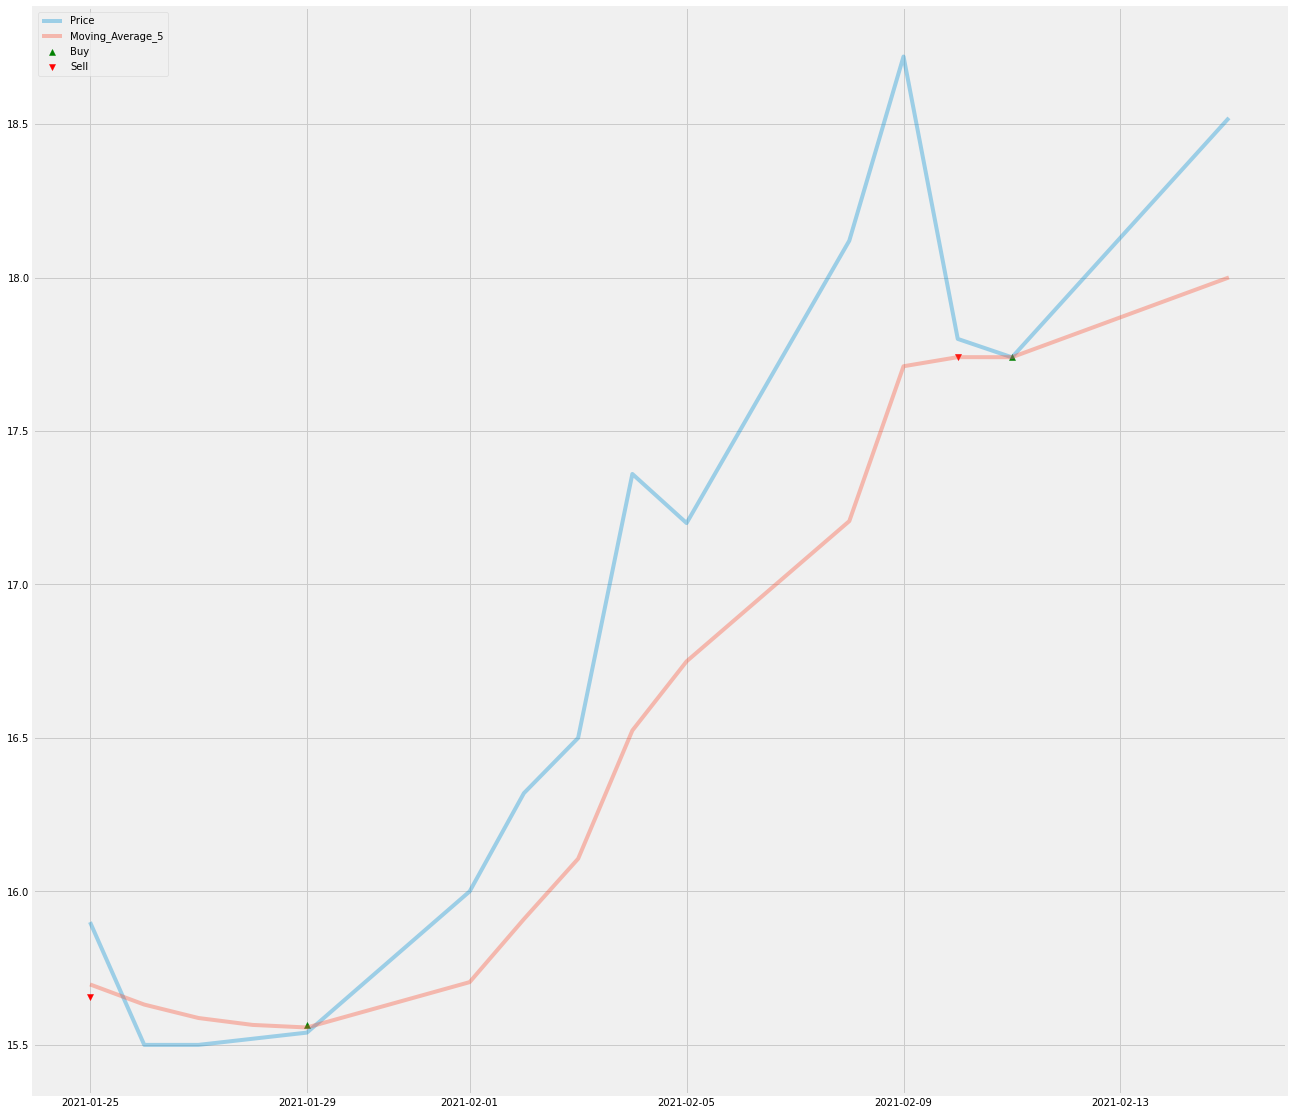

In [ ]:
indicator_EMA(5, 'Price', 0, 15)